## Data Wrangling

In [2]:
# !pip install wordcloud
# !pip install snscrape

# Built-in package
import re
from string import punctuation

# Plotting package
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK package
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import en_core_web_sm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Scikit-Learn package
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Mathematical operation package
import pandas as pd
import numpy as np

# twitter scrapper
import snscrape.modules.twitter as sntwitter


In [3]:
# Importing of scraped data from twitter with word chatgpt
df = pd.read_csv('chatgpt_tweet.csv')
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-02-27 23:59:59+00:00,1630357108662075402,@themarcusramsey Learn chatGPT guys for everyt...,MeEmpratoor
1,2023-02-27 23:59:57+00:00,1630357098532839424,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,AznburInnit
2,2023-02-27 23:59:46+00:00,1630357051615617025,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,muko20594899
3,2023-02-27 23:59:43+00:00,1630357039833812993,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,still_your_turn
4,2023-02-27 23:59:41+00:00,1630357031881445378,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,camelemonglass


In [4]:
pattern = '&(amp|lt|gt);?'
pattern_replace_map = {
    '&lt;': '<',
    '&gt;': '>',
    '&amp;': 'and'
}

# Define a function to replace the matches with their corresponding values
def replace_match(match):
    return pattern_replace_map[match.group(0)]


def tweet_process(tweet_text: str) -> str:
    """
        Processes the tweet text to remove any non-ascii characters.
        
        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str:
            A string only containing ascii characters 
    """
    tweet_text = re.sub('https://\S+|http://\S+', '', tweet_text) # Remove whole links
    tweet_text = re.sub(pattern, replace_match, tweet_text) # Converting html tags references
    tweet_text = re.sub('\d+', '', tweet_text) # removing numbers from text
    # Remove new lines, mentions, hastags, and multiple spaces
    tweet_text = re.sub('[\r\n]+', ' ', tweet_text)
    tweet_text = re.sub(r'@\w+', '', tweet_text)
    tweet_text = re.sub(r'#\w+', '', tweet_text)
    tweet_text = re.sub('\s+', ' ', tweet_text)
    tweet_text = re.sub(r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}:\d{2}:\d{2}\b", "", tweet_text) # Remove datetime string
    return tweet_text.lower()


In [5]:
# Creating a new column for precessed tweet text
df['processed_tweet'] = df['Text'].apply(tweet_process)

In [6]:
df.head()

,Datetime,Tweet Id,Text,Username,processed_tweet
0,2023-02-27 23:59:59+00:00,1630357108662075402,@themarcusramsey Learn chatGPT guys for everyt...,MeEmpratoor,learn chatgpt guys for everything.
1,2023-02-27 23:59:57+00:00,1630357098532839424,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,AznburInnit,you really want chatgpt to rule the world?
2,2023-02-27 23:59:46+00:00,1630357051615617025,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,muko20594899,この直木賞作家のおっさんもこれを機にこっそり使うんちゃう いやもう使ってるかも 知らんけど
3,2023-02-27 23:59:43+00:00,1630357039833812993,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,still_your_turn,すごい流行ってるね。 もう、インテルあたりは 設計に機械学習使ってるよね。 最適化は進むな...
4,2023-02-27 23:59:41+00:00,1630357031881445378,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,camelemonglass,以前、chatgptで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...


In [7]:
df.sample(n=20)

,Datetime,Tweet Id,Text,Username,processed_tweet
4346,2023-02-27 21:00:54+00:00,1630312037757624323,chatGPTを使用していますか。”YesOrNo” https://t.co/sSDLee...,toshiaki_taoka,chatgptを使用していますか。”yesorno”
5694,2023-02-27 20:01:46+00:00,1630297157449179137,Want to participate in a crypto IDO similar to...,cryptomaggs,want to participate in a crypto ido similar to...
1060,2023-02-27 23:16:13+00:00,1630346092478107648,【宮迫博之のサコるニュース】第5回 ゲスト：青笹寛史(アズール株式会社代表)＆須田慎一郎(経...,mmmurawa0021,【宮迫博之のサコるニュース】第回 ゲスト：青笹寛史(アズール株式会社代表)＆須田慎一郎(経済...
54,2023-02-27 23:57:40+00:00,1630356522571288576,Snapchat is releasing its own AI chatbot power...,yukitaylor00,snapchat is releasing its own ai chatbot power...
4064,2023-02-27 21:13:17+00:00,1630315153718931457,Snapchat lanza un chatbot de inteligencia arti...,telelatinatv2,snapchat lanza un chatbot de inteligencia arti...
406,2023-02-27 23:43:47+00:00,1630353029382717440,@ana_grimbaum Me puede repetir la pregunta...p...,Gaspaal,me puede repetir la pregunta...por favor? ......
3157,2023-02-27 21:55:36+00:00,1630325804759494657,Replying to @SeaSeaBee\r\n#ChatGPT is just an ...,dan81359,"replying to is just an ai propaganda tool, to ..."
3405,2023-02-27 21:42:31+00:00,1630322510326644736,@notbrxve @HYPEX chatgpt wouldn't be able to f...,DripMUIGoku,"chatgpt wouldn't be able to figure that out, ..."
5777,2023-02-27 19:58:51+00:00,1630296424695906304,@salnog @MiguelNicolelis @RafaelPahim O que pe...,andre_luizv,o que pensam sobre o nosso desempenho futuram...
4900,2023-02-27 20:36:20+00:00,1630305858738622464,"""Don't buy anything for 18 months.""...\r\n\r\n...",ExoverseMedia,"""don't buy anything for months.""... six months..."


In [8]:
# Deleting other columns besides text and precessed_tweet
df.drop(['Datetime', 'Tweet Id', 'Username'], axis=1, inplace=True)
df

,Text,processed_tweet
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?
2,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,この直木賞作家のおっさんもこれを機にこっそり使うんちゃう いやもう使ってるかも 知らんけど
3,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,すごい流行ってるね。 もう、インテルあたりは 設計に機械学習使ってるよね。 最適化は進むな...
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,以前、chatgptで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...
...,...,...
5996,"Dr. @emollick, an Associate Professor at @Whar...","dr. , an associate professor at of the univers..."
5997,@alexxprs La maîtrise d'Excel c'est de la logi...,la maîtrise d'excel c'est de la logique et qu...
5998,@GnuDoyng 有没有试试ChatGPT评估一下他的《移民基础》回答的如何,有没有试试chatgpt评估一下他的《移民基础》回答的如何
5999,2023-02-28 03:47:55 \r\n👌😀😄😝😌 \r\nBy different...,-- :: 👌😀😄😝😌 by different baby world necessary ...


In [9]:
pattern = r'[^\x00-\x7F]+'
def keep_english_words(text: str) -> str:
    """
        Keep only english words in the text.

        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            A string only containing english words 
    """
    return re.sub(pattern, '', text)


In [10]:
# Removing other languages from the text
df['processed_tweet'] = df['processed_tweet'].apply(keep_english_words)
df.head()

,Text,processed_tweet
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?
2,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,
3,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt


In [11]:
# Checking for null values
df.isnull().sum()

Text               0
processed_tweet    0
dtype: int64

In [12]:
nlp = en_core_web_sm.load()

In [13]:
df['processed_tweet'].sample(n=15)

4535                                       $clcgy like   
4318                                   [ ]chatgpt    top 
2494                                   chatgpt       !:))
4433    when you bully chatgpt into confusion  humanit...
970      yo estoy alucinando con chatgpt. creo que me ...
4539    a ferramenta de inteligncia artificial, chatgp...
4735    google search: discovery and inspiration chatg...
3430                          indulo joke ekkada undo??  
2353               response exceeds tweet character limit
3047          the possible perils of via enrico molinari 
5916    uh que el chatgpt tiene mejores temas de conve...
5762    snap $snap openaichatgptmy ai snachat $. chatg...
4663    the double standard i am seeing developing: jo...
3359                                       chatgptaiai ai
857                                  did chatgpt do this 
Name: processed_tweet, dtype: object

In [14]:
def get_n_gram(corpus: pd.Series, n: int=None, range: tuple=(2, 2)) -> list:
    """
        Returns n-grams from a corpus.

        ### Parameters
        corpus: pd.Series
            A dataframe series containing corpus.
        n: int 
            The number of n-grams to return.
        range: tuple
            The range of n-grams to return.

        ### Returns
        list: 
            List of top occurring n-grams
    """
    count_vector = CountVectorizer(ngram_range=range, stop_words='english').fit(corpus)
    bag_of_words =  count_vector.fit_transform(corpus)
    bg_sum = bag_of_words.sum(axis=0)
    words_freq = [(word, bg_sum[0, idx]) for word, idx in count_vector.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [15]:
# getting bi common words
bi_common_words = get_n_gram(df['processed_tweet'], 15)

In [16]:
bi_common_words

[('chat gpt', 596),
 ('character limit', 259),
 ('tweet character', 190),
 ('response exceeds', 188),
 ('exceeds tweet', 165),
 ('using chatgpt', 93),
 ('use chatgpt', 77),
 ('chatgpt write', 67),
 ('asked chatgpt', 65),
 ('chatgpt ai', 63),
 ('like chatgpt', 59),
 ('inteligencia artificial', 54),
 ('ai chatbot', 53),
 ('chatbot powered', 49),
 ('ask chatgpt', 47)]

In [17]:
def visualization_n_gram(common_words: list, title: str) -> None:
    """
        Visualization of n-grams
        
        ### Parameters
        common_words: list
            list of common n_gram words 
            >>> [('chat gpt', 596),
                    ('character limit', 259),
                ]
        title: str
            Title of graph
        ### Return
        None
    """
    # Create a dataframe 
    vis_df = pd.DataFrame(common_words, columns=['Tweet', 'Count'])
    vis_df.plot(x='Tweet', y='Count', kind='bar', title=title)

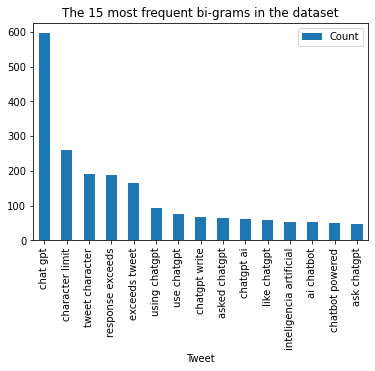

In [18]:
visualization_n_gram(common_words=bi_common_words, title='The 15 most frequent bi-grams in the dataset')

In [19]:
# getting tri common words
tri_common_words = get_n_gram(df['processed_tweet'], 15, range=(3,3))
tri_common_words

[('tweet character limit', 190),
 ('response exceeds tweet', 165),
 ('exceeds tweet character', 165),
 ('ai chatbot powered', 40),
 ('chatbot powered chatgpt', 37),
 ('character limit tweet', 37),
 ('exceeds character limit', 27),
 ('releasing ai chatbot', 25),
 ('snapchat releasing ai', 24),
 ('response exceeds character', 22),
 ('basado en chatgpt', 19),
 ('chatbot inteligencia artificial', 18),
 ('el chat gpt', 18),
 ('asked chatgpt write', 18),
 ('sorry response exceeds', 18)]

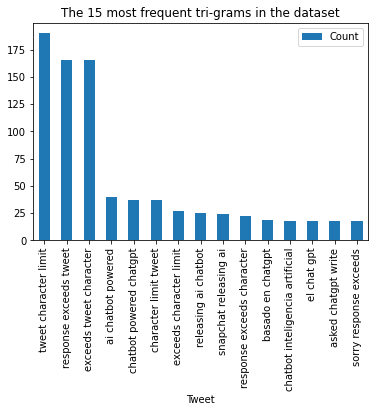

In [20]:
visualization_n_gram(tri_common_words, title='The 15 most frequent tri-grams in the dataset')

In [21]:
def remove_punct(text: str) -> str:
    """
        Remove punctuation from a string.

        ### Parameters 
        text: str 
            The string to remove punctuation from.

        ### Returns
        text: str
            The string with punctuation removed.
    """
    text = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    return text

In [22]:
# creating new column as remove_punct by removing punctuations from processed_tweet
df['remove_punct'] = df['processed_tweet'].apply(remove_punct)

In [23]:
# Removing punctuations
df['remove_punct'] = df['remove_punct'].apply(word_tokenize)
df.head()

,Text,processed_tweet,remove_punct
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.,"[learn, chatgpt, guys, for, everything]"
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?,"[you, really, want, chatgpt, to, rule, the, wo..."
2,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,,[]
3,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,,[]
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt,[chatgpt]


In [24]:
stopwords = set(stopwords.words("english"))

def remove_stopwords(text: list) -> list:
    """
        Removes stopwords from text.

        ### Parameters
        text: str 
            list of words
        
        ### Returns
        list:
            list of words without stopwords
    """
    text_list = [word for word in text if word.lower() not in stopwords]
    return text_list

In [25]:
# Removing stopwords
df['remove_stopwords'] = df['remove_punct'].apply(remove_stopwords)
df

,Text,processed_tweet,remove_punct,remove_stopwords
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.,"[learn, chatgpt, guys, for, everything]","[learn, chatgpt, guys, everything]"
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?,"[you, really, want, chatgpt, to, rule, the, wo...","[really, want, chatgpt, rule, world]"
2,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,,[],[]
3,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,,[],[]
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt,[chatgpt],[chatgpt]
...,...,...,...,...
5996,"Dr. @emollick, an Associate Professor at @Whar...","dr. , an associate professor at of the univers...","[dr, an, associate, professor, at, of, the, un...","[dr, associate, professor, university, joins, ..."
5997,@alexxprs La maîtrise d'Excel c'est de la logi...,la matrise d'excel c'est de la logique et que...,"[la, matrise, dexcel, cest, de, la, logique, e...","[la, matrise, dexcel, cest, de, la, logique, e..."
5998,@GnuDoyng 有没有试试ChatGPT评估一下他的《移民基础》回答的如何,chatgpt,[chatgpt],[chatgpt]
5999,2023-02-28 03:47:55 \r\n👌😀😄😝😌 \r\nBy different...,-- :: by different baby world necessary best.,"[by, different, baby, world, necessary, best]","[different, baby, world, necessary, best]"


In [26]:
def get_pos_tag(text_list: list) -> list:
    """
        Returns a list of POS tags for the given list of words.

        ### Parameters
        text_list: list
            A list of words

        ### Returns
        list:
            A list of POS tags
    """
    return nltk.pos_tag(text_list)

In [27]:
# getting part of speech 
df['pos_tag'] = df['remove_stopwords'].apply(get_pos_tag)
df.head()

,Text,processed_tweet,remove_punct,remove_stopwords,pos_tag
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.,"[learn, chatgpt, guys, for, everything]","[learn, chatgpt, guys, everything]","[(learn, JJ), (chatgpt, NN), (guys, NNS), (eve..."
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?,"[you, really, want, chatgpt, to, rule, the, wo...","[really, want, chatgpt, rule, world]","[(really, RB), (want, JJ), (chatgpt, NN), (rul..."
2,#モーニングショー\r\n#チャットGPT\r\n#ChatGPT\r\nこの直木賞作家のお...,,[],[],[]
3,#chatGPT \r\nすごい流行ってるね。\r\nもう、インテルあたりは\r\n設計に機...,,[],[],[]
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt,[chatgpt],[chatgpt],"[(chatgpt, NN)]"


In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def word_pos_lemmetize(text_list: list) -> list:
    """
        Return a list of words with lemma form.

        ### Parameters
        text_list: list
            A list of words.

        ### Returns
        list:
            A list of words converted to lemma form.
    """
    new_lemmetize_list = []
    for text, tag in text_list:
        text = text.lower()
        if tag.startswith('N'):
            wld = lemmatizer.lemmatize(text, pos='n')
        elif tag.startswith('V'):
            wld = lemmatizer.lemmatize(text, pos='v')
        elif tag.startswith('J'):
            wld = lemmatizer.lemmatize(text, pos='a')
        elif tag.startswith('R'):
            wld = lemmatizer.lemmatize(text, pos='r')
        else:
            wld = text
        new_lemmetize_list.append(wld)
    return new_lemmetize_list

In [31]:
df['text_lemmatizer'] = df['pos_tag'].apply(word_pos_lemmetize)

In [32]:
df.sample(n=25)

,Text,processed_tweet,remove_punct,remove_stopwords,pos_tag,text_lemmatizer
956,@VieilleCriss Afin d'augmenter la productivité...,"afin d'augmenter la productivit, les employs ...","[afin, daugmenter, la, productivit, les, emplo...","[afin, daugmenter, la, productivit, les, emplo...","[(afin, NN), (daugmenter, NN), (la, NN), (prod...","[afin, daugmenter, la, productivit, les, emplo..."
3649,ChatGPT＝🦛側の愚民をだますツール\r\nワクチンについての対話をしたが、AIは手洗い...,chatgpt ai ai ai,"[chatgpt, ai, ai, ai]","[chatgpt, ai, ai, ai]","[(chatgpt, NN), (ai, NN), (ai, NN), (ai, NN)]","[chatgpt, ai, ai, ai]"
391,Had an amazing time chatting w/ my friend @mar...,had an amazing time chatting w/ my friend on c...,"[had, an, amazing, time, chatting, w, my, frie...","[amazing, time, chatting, w, friend, creator, ...","[(amazing, JJ), (time, NN), (chatting, VBG), (...","[amazing, time, chat, w, friend, creator, lab,..."
2525,@The_Trump_Train This is what chatGPT gave me ...,this is what chatgpt gave me days ago,"[this, is, what, chatgpt, gave, me, days, ago]","[chatgpt, gave, days, ago]","[(chatgpt, NNS), (gave, VBD), (days, NNS), (ag...","[chatgpt, give, day, ago]"
1012,$UNT - UNITH\r\nUNT_ASX\r\n\r\nUNITH getting a...,$unt - unith unt_asx unith getting a lot of as...,"[unt, unith, untasx, unith, getting, a, lot, o...","[unt, unith, untasx, unith, getting, lot, asx,...","[(unt, NN), (unith, JJ), (untasx, JJ), (unith,...","[unt, unith, untasx, unith, get, lot, asx, att..."
4153,ChatGPT confession: Global warming? Not much s...,chatgpt confession: global warming? not much s...,"[chatgpt, confession, global, warming, not, mu...","[chatgpt, confession, global, warming, much, s...","[(chatgpt, NN), (confession, NN), (global, JJ)...","[chatgpt, confession, global, warming, much, s..."
1827,"""Se ela quiser sua ajuda, certamente irá procu...","""se ela quiser sua ajuda, certamente ir procur...","[se, ela, quiser, sua, ajuda, certamente, ir, ...","[se, ela, quiser, sua, ajuda, certamente, ir, ...","[(se, NN), (ela, CC), (quiser, NN), (sua, NN),...","[se, ela, quiser, sua, ajuda, certamente, ir, ..."
4459,@expastor @UrbanizedOkie I use #chatGPT to fre...,i use to free up time to create. people alway...,"[i, use, to, free, up, time, to, create, peopl...","[use, free, time, create, people, always, over...","[(use, RB), (free, JJ), (time, NN), (create, J...","[use, free, time, create, people, always, over..."
2245,@gpt_chatgpt Response exceeds tweet character ...,response exceeds tweet character limit,"[response, exceeds, tweet, character, limit]","[response, exceeds, tweet, character, limit]","[(response, NN), (exceeds, VBZ), (tweet, JJ), ...","[response, exceed, tweet, character, limit]"
2311,@RedeagleArmy Chatgpt est pas dispo dans mon p...,chatgpt est pas dispo dans mon pays cest lcon...,"[chatgpt, est, pas, dispo, dans, mon, pays, ce...","[chatgpt, est, pas, dispo, dans, mon, pays, ce...","[(chatgpt, NN), (est, JJS), (pas, NN), (dispo,...","[chatgpt, est, pa, dispo, dans, mon, pay, c, l..."


In [33]:
def convert_list_to_str(text_list: list) -> str:
    """
        Convert a list of strings to a string.

        ### Parameters
        text_list: list
            A list of strings

        ### Returns
        str:
            A text of string
    """
    str_text = ''
    for i in text_list:
        str_text += i +' '
    return str_text

In [34]:
all_text = " ".join(df['text_lemmatizer'].apply(convert_list_to_str))

#### Visualization of textual data

In [35]:
word_cloud = WordCloud(
    width=3000,
    height=3000,
    stopwords=STOPWORDS,
    mode="RGBA",
    background_color='white',
).generate(all_text)

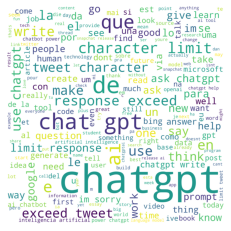

In [36]:
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [37]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))

In [38]:
X = vectorizer.fit_transform(df['text_lemmatizer'].map(lambda x: ' '.join(x)).tolist())

In [39]:
X

<6001x97972 sparse matrix of type '<class 'numpy.float64'>'
	with 154280 stored elements in Compressed Sparse Row format>

In [40]:
X.shape

(6001, 97972)

In [41]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Dimensionality Reduction -> Principal Component Analysis

In [42]:
from sklearn.decomposition import PCA
import numpy as np

# create a PCA object and specify the number of components to keep
pca = PCA(n_components=50)

# fit the PCA model to the data and transform it
X_pca = pca.fit_transform(df_tfidf)

# print the original data shape and the PCA transformed data shape
print("Original data shape: ", df_tfidf.shape)
print("Transformed data shape: ", X_pca.shape)


Original data shape:  (6001, 97972)
Transformed data shape:  (6001, 50)


#### KMeans Clustering

In [46]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [51]:
# Building the clustering model and calculating the values of the Distortion and Inertia
distortions = []
inertias = []
clusters = range(1, 10)
# KMeans algorithm for cluster of 1 to 10
for k in clusters:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)  
    distortions.append(sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X_pca.shape[0])
    inertias.append(kmeanModel.inertia_)

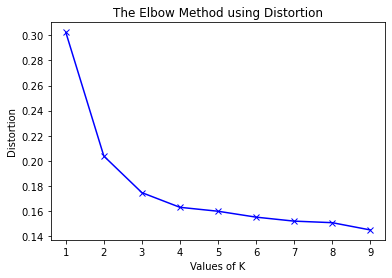

In [52]:
# Tabulating and Visualizing the results using the different values of Distortion
plt.plot(clusters, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

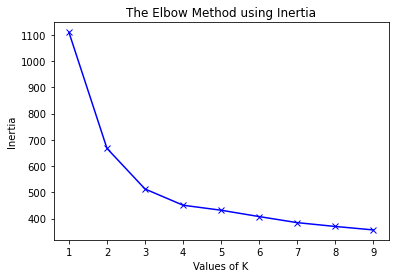

In [53]:
# Tabulating and Visualizing the results using the different values of inertias
plt.plot(clusters, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2.

#### Pandas Profiling of final dataset

In [55]:
import pandas_profiling as pp

In [57]:
profile = pp.ProfileReport(pd.DataFrame(X_pca))

In [58]:
profile.to_file('chatgpt_tweets_data_profile')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]